In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint


# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras.applications.resnet50 import ResNet50
import pathlib
import re
import shutil
from scipy import ndarray
import random
import skimage as sk
from skimage import io
from skimage.util import img_as_ubyte
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import h5py
!pip install mahotas
import mahotas
import pickle
from sklearn import svm
from skimage.transform import resize 
from skimage.io import imread
from sklearn import neighbors, datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
import zipfile
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop, Adam
from imblearn.over_sampling import SMOTE
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.3 MB/s eta 0:00:0000:0100:01


Pre-Processing

In [2]:
data_dir = '/kaggle/input/fruit-recognition/train/train/'
data_dir = pathlib.Path(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']
16854


[33, 492, 492, 492, 427, 490, 462, 490, 492, 492, 490, 450, 392, 984, 466, 492, 490, 490, 438, 479, 492, 490, 492, 696, 444, 666, 490, 447, 492, 450, 490, 492, 738, 475]
[492, 492, 492, 427, 490, 462, 490, 492, 492, 490, 450, 392, 984, 466, 492, 490, 490, 438, 479, 492, 490, 492, 696, 444, 666, 490, 447, 492, 450, 490, 492, 738, 475]


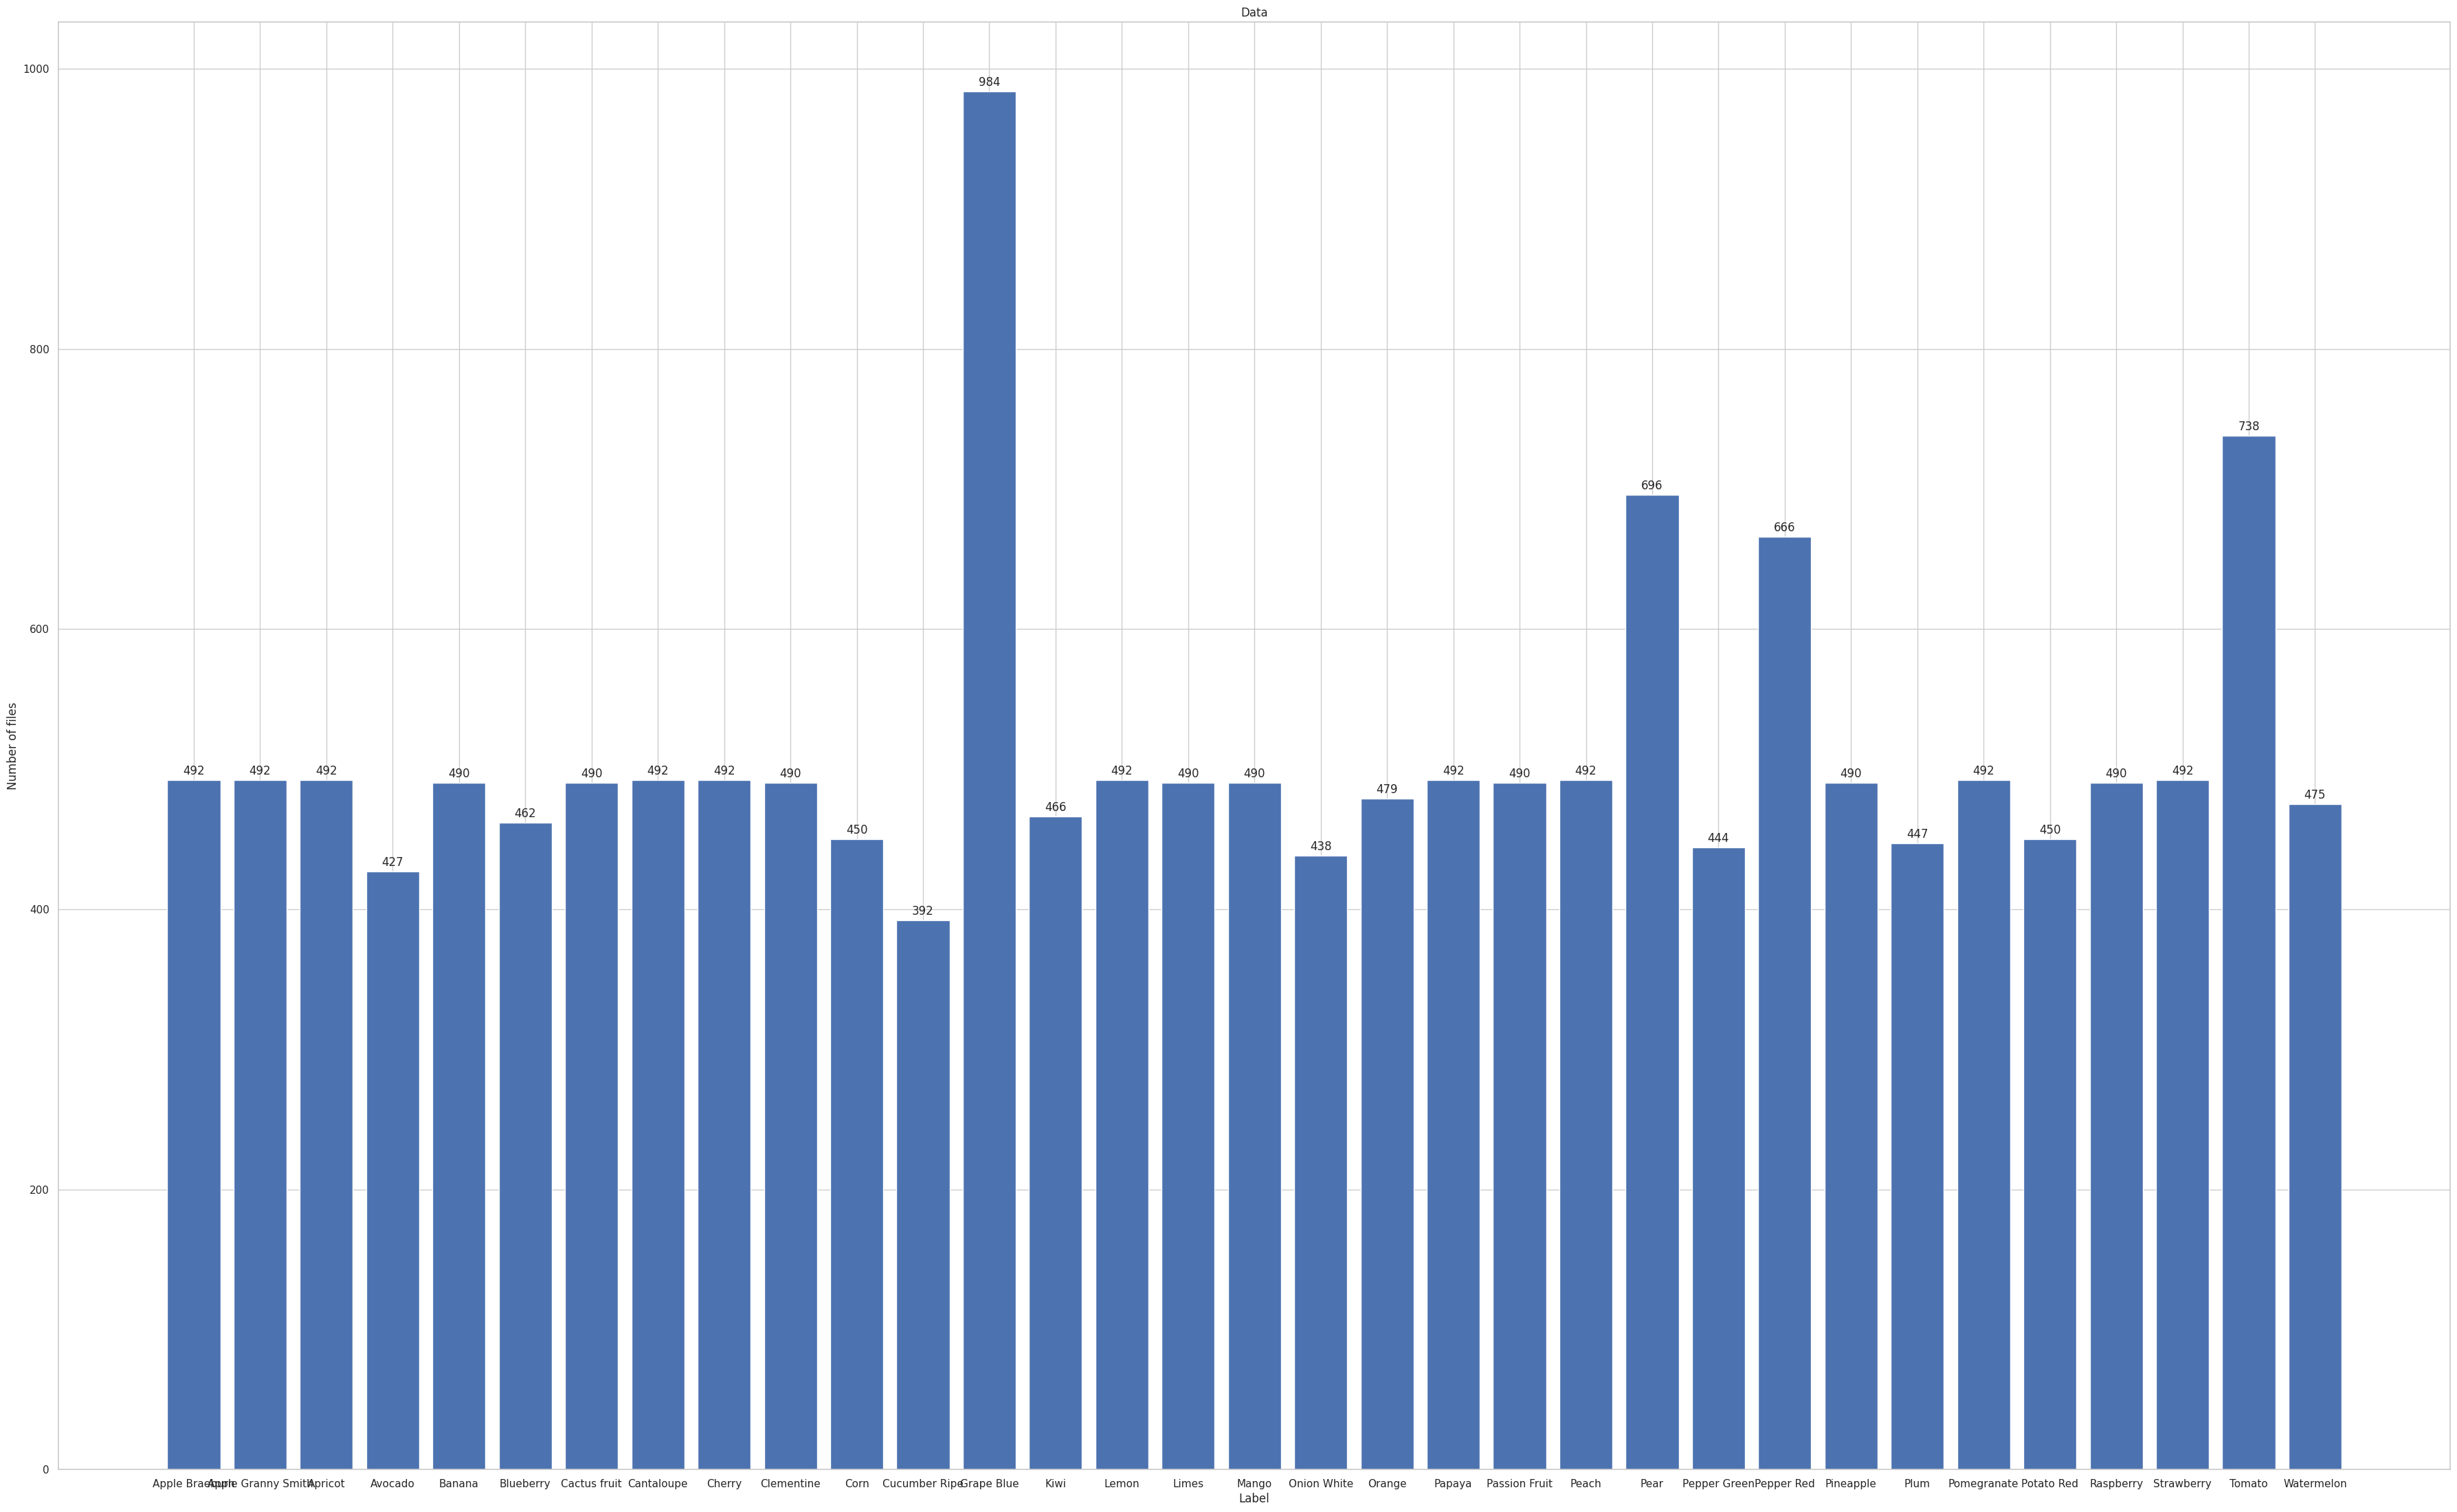

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


In [3]:
def plot_histogram(dir):
    f = [item_num for item_num in dir.rglob('*')] 
    values, counts = np.unique([x.parent for x in f ], return_counts=True)
    #print(list(zip(counts, values)))
    x_name = tuple(class_names) 
    y_pos = np.arange(len(x_name))
    x_value = list(counts)
    print(x_value)
    x_value.pop(0)
    print(x_value)
    plt.subplots(figsize=(40,26))
    bars = plt.bar(y_pos, x_value, align='center', alpha=1)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, yval, ha='center', va='bottom')
    plt.xticks(y_pos, x_name)
    plt.xlabel('Label')
    plt.ylabel('Number of files')
    plt.title('Data')
    plt.show()

plot_histogram(data_dir)

print(class_names)


[33, 394, 394, 394, 342, 392, 370, 392, 394, 394, 392, 360, 314, 788, 373, 394, 392, 392, 351, 384, 394, 392, 394, 557, 356, 533, 392, 358, 394, 360, 392, 394, 591, 380]
[394, 394, 394, 342, 392, 370, 392, 394, 394, 392, 360, 314, 788, 373, 394, 392, 392, 351, 384, 394, 392, 394, 557, 356, 533, 392, 358, 394, 360, 392, 394, 591, 380]


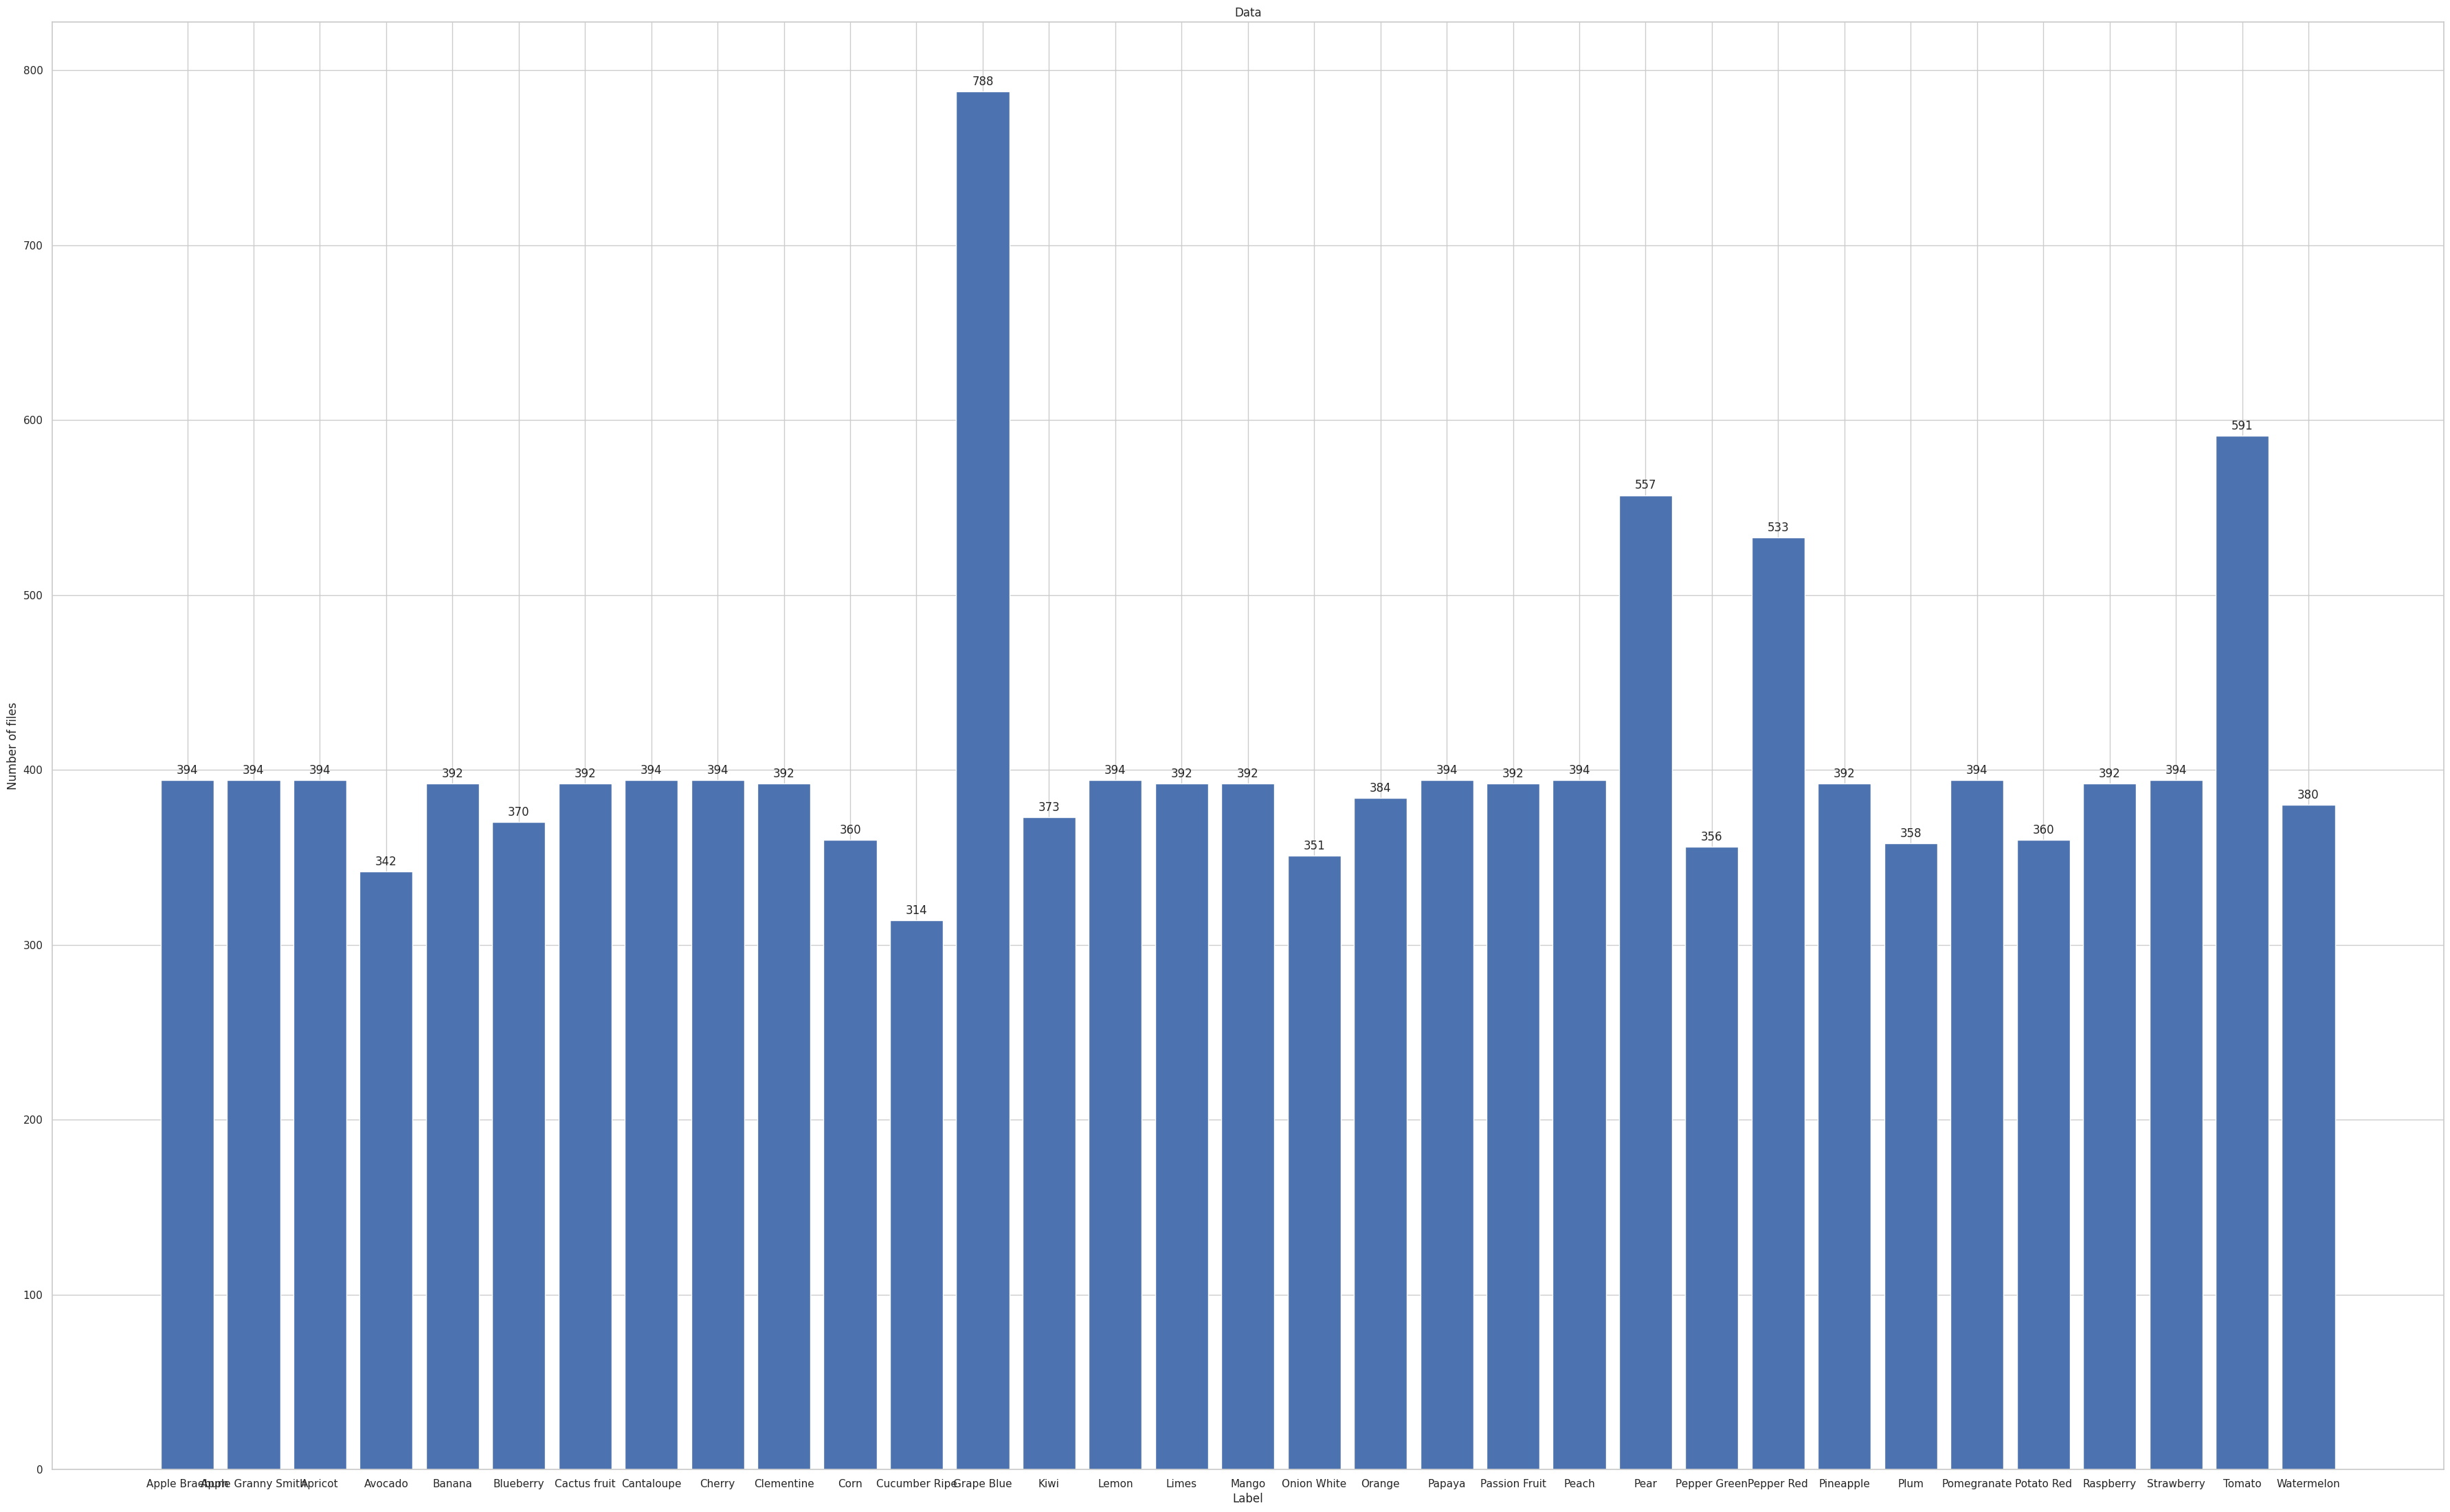

[33, 98, 98, 98, 85, 98, 92, 98, 98, 98, 98, 90, 78, 196, 93, 98, 98, 98, 87, 95, 98, 98, 98, 139, 88, 133, 98, 89, 98, 90, 98, 98, 147, 95]
[98, 98, 98, 85, 98, 92, 98, 98, 98, 98, 90, 78, 196, 93, 98, 98, 98, 87, 95, 98, 98, 98, 139, 88, 133, 98, 89, 98, 90, 98, 98, 147, 95]


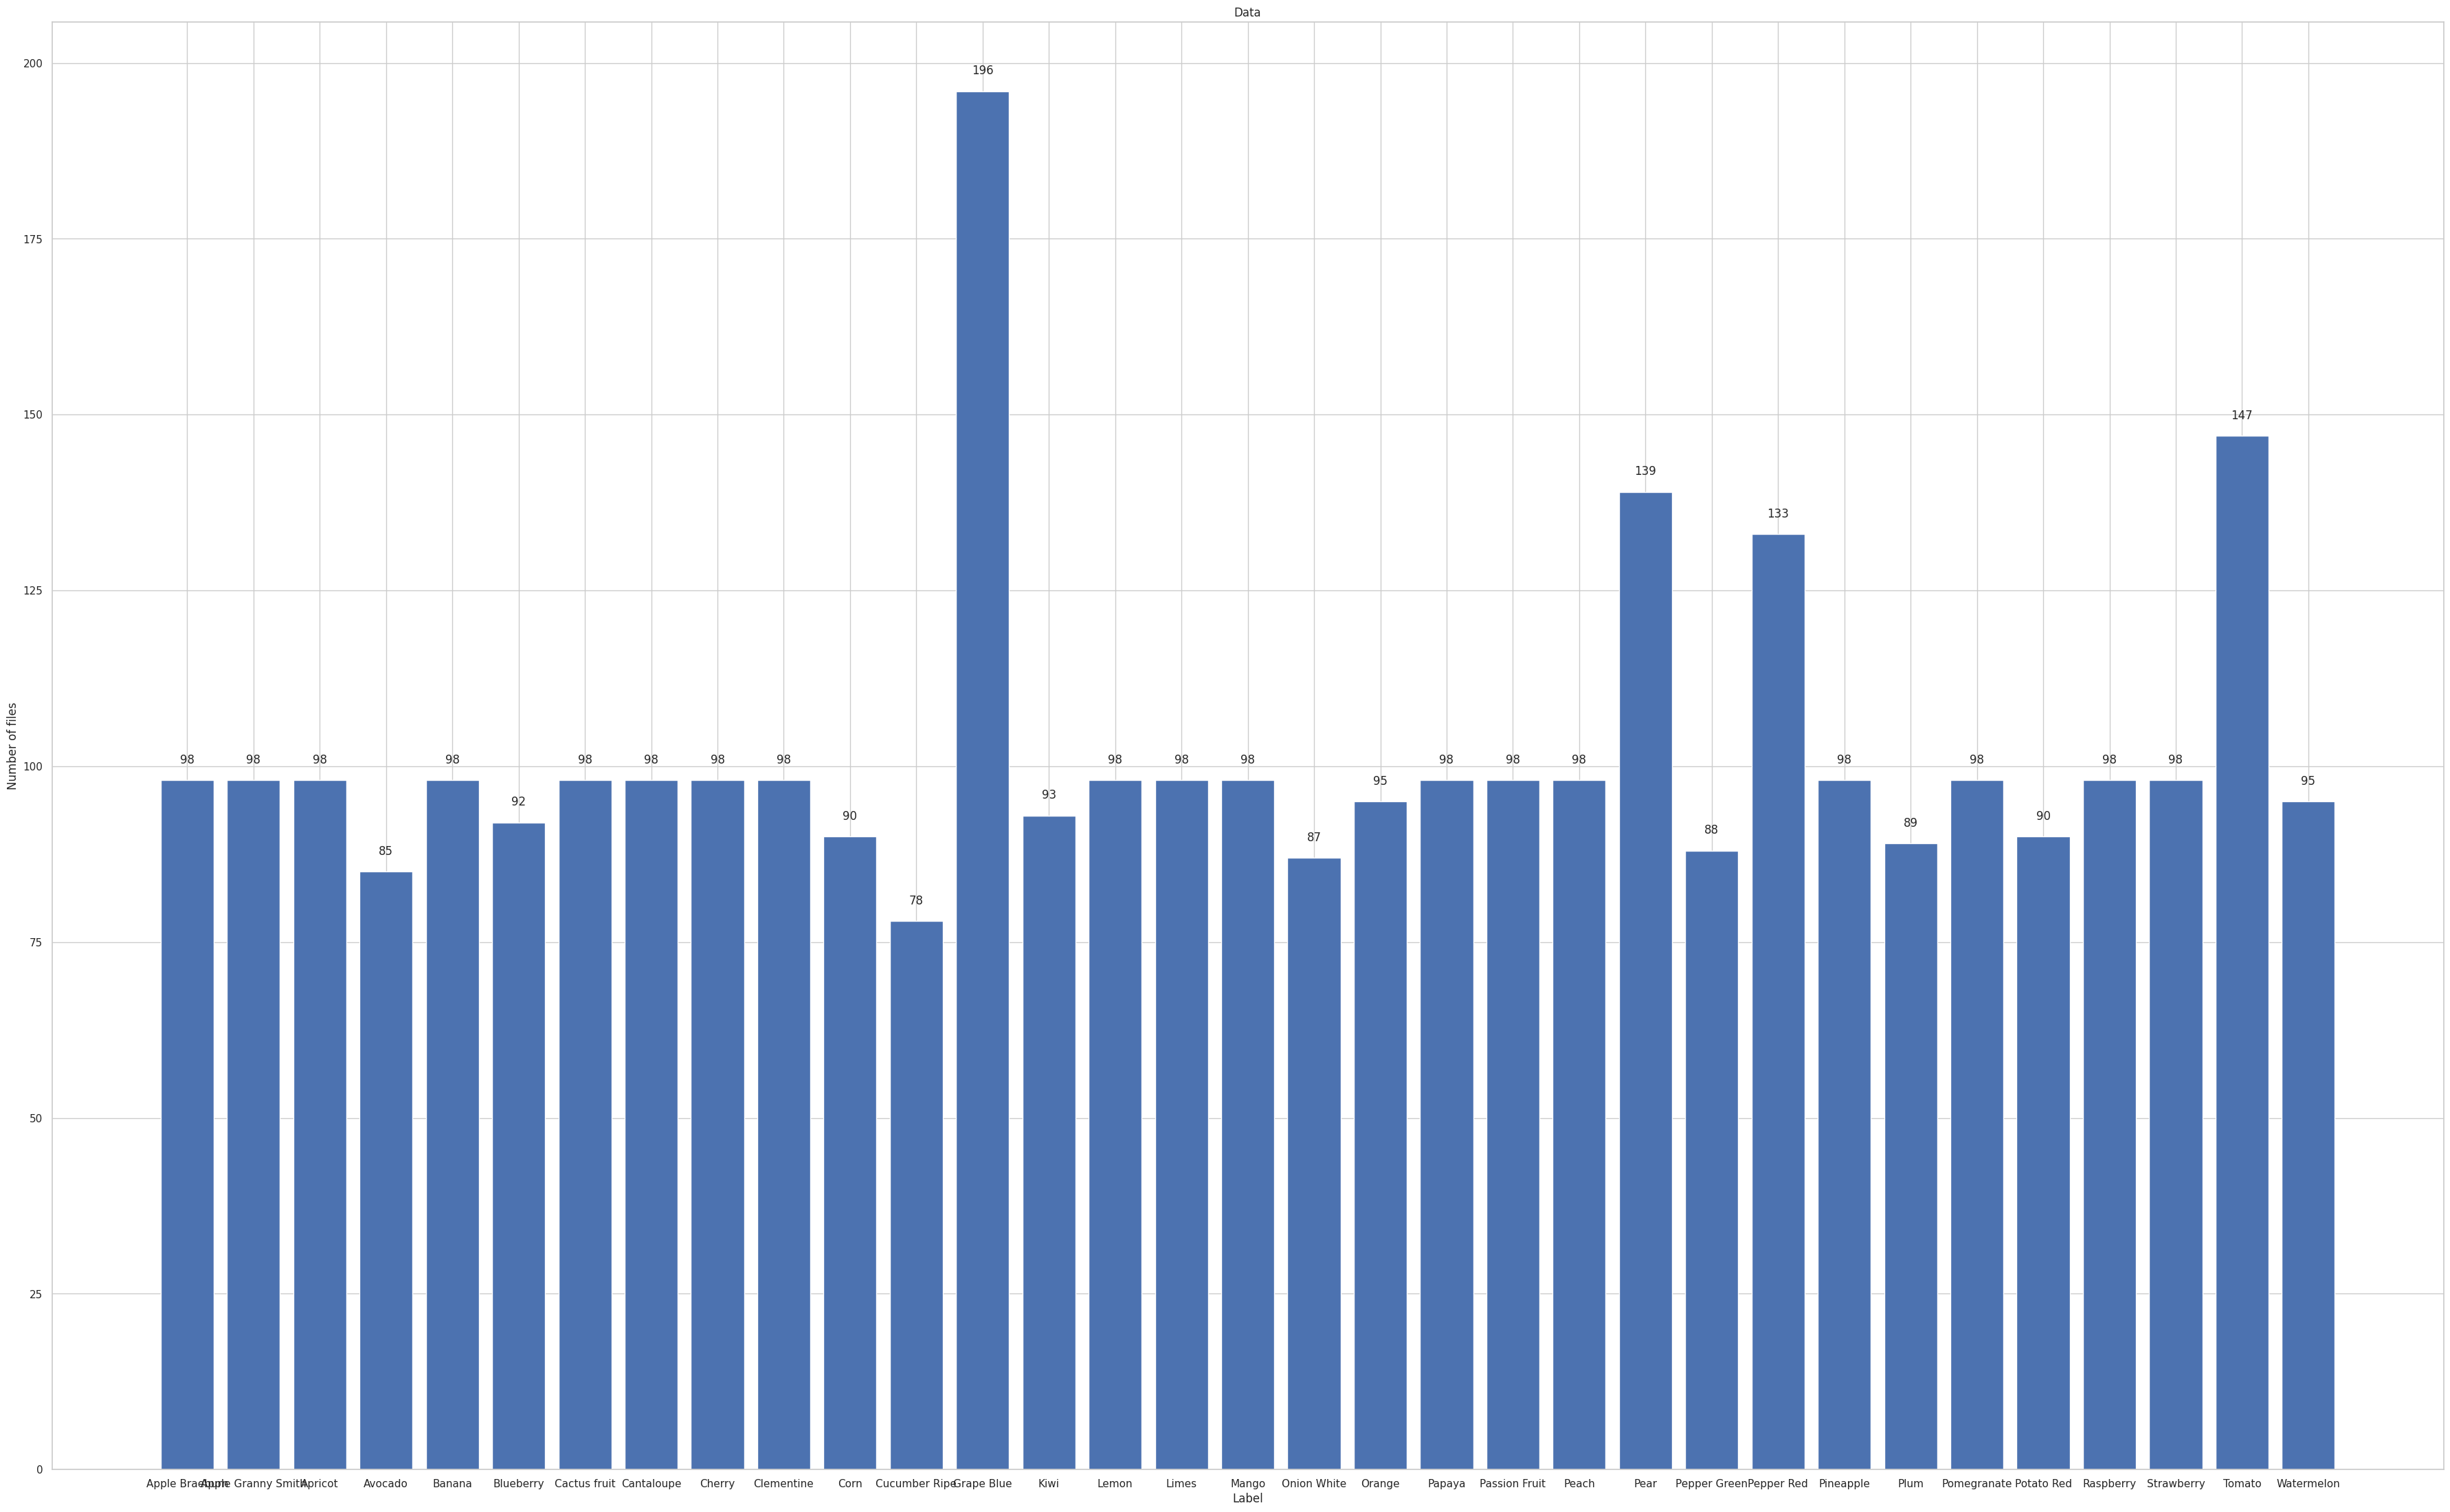

In [4]:
for i in range(0, 33):
  var = pathlib.Path("/kaggle/input/fruit-recognition/train/train/"+str(class_names[i])+"/*")
  list_ds = tf.data.Dataset.list_files(str(var), shuffle=True)
  image_count = len(list(data_dir.glob(str(class_names[i])+'/*.jpg')))
  #print(image_count)
  val_size = int(image_count * 0.2) #10-2=80% data train
  train_ds_list = list_ds.skip(val_size)
  globals()['train_ds_list_%s' % i] = train_ds_list
  train_ds_list_size = tf.data.experimental.cardinality(train_ds_list).numpy()
  #print(train_ds_list_size)
  test_ds_list_size = image_count - train_ds_list_size
  test_ds_list = list_ds.skip(train_ds_list_size).take(test_ds_list_size)
  globals()['test_ds_list_%s' % i] = test_ds_list
  #print(test_ds_list_size)

train_ds_list = train_ds_list_0.concatenate(train_ds_list_1).concatenate(train_ds_list_2).concatenate(train_ds_list_3).concatenate(train_ds_list_4).concatenate(train_ds_list_5).concatenate(train_ds_list_6).concatenate(train_ds_list_7).concatenate(train_ds_list_8).concatenate(train_ds_list_9).concatenate(train_ds_list_10)
train_ds_list = train_ds_list.concatenate(train_ds_list_11).concatenate(train_ds_list_12).concatenate(train_ds_list_13).concatenate(train_ds_list_14).concatenate(train_ds_list_15).concatenate(train_ds_list_16).concatenate(train_ds_list_17).concatenate(train_ds_list_18).concatenate(train_ds_list_19).concatenate(train_ds_list_20)
train_ds_list = train_ds_list.concatenate(train_ds_list_21).concatenate(train_ds_list_22).concatenate(train_ds_list_23).concatenate(train_ds_list_24).concatenate(train_ds_list_25).concatenate(train_ds_list_26).concatenate(train_ds_list_27).concatenate(train_ds_list_28).concatenate(train_ds_list_29).concatenate(train_ds_list_30)
train_ds_list = train_ds_list.concatenate(train_ds_list_31).concatenate(train_ds_list_32)

test_ds_list = test_ds_list_0.concatenate(test_ds_list_1).concatenate(test_ds_list_2).concatenate(test_ds_list_3).concatenate(test_ds_list_4).concatenate(test_ds_list_5).concatenate(test_ds_list_6).concatenate(test_ds_list_7).concatenate(test_ds_list_8).concatenate(test_ds_list_9).concatenate(test_ds_list_10)
test_ds_list = test_ds_list.concatenate(test_ds_list_11).concatenate(test_ds_list_12).concatenate(test_ds_list_13).concatenate(test_ds_list_14).concatenate(test_ds_list_15).concatenate(test_ds_list_16).concatenate(test_ds_list_17).concatenate(test_ds_list_18).concatenate(test_ds_list_19).concatenate(test_ds_list_20)
test_ds_list = test_ds_list.concatenate(test_ds_list_21).concatenate(test_ds_list_22).concatenate(test_ds_list_23).concatenate(test_ds_list_24).concatenate(test_ds_list_25).concatenate(test_ds_list_26).concatenate(test_ds_list_27).concatenate(test_ds_list_28).concatenate(test_ds_list_29).concatenate(test_ds_list_30)
test_ds_list = test_ds_list.concatenate(test_ds_list_31).concatenate(test_ds_list_32)

data_dir_train = pathlib.Path("/kaggle/working/fruit-recognition-train")
if not os.path.exists(data_dir_train):
  os.makedirs(data_dir_train)

#paste above train_ds_list to data_dir_train
for f in train_ds_list.as_numpy_iterator():
  link = f.decode("utf-8")
  substring = re.search('(.*)/(.*)/(.*)', link)
  dst = pathlib.Path("/kaggle/working/fruit-recognition-train/"+substring.group(2))
  if not os.path.exists(dst):
    os.makedirs(dst)
  shutil.copy2(link, dst)

data_dir_test = pathlib.Path("/kaggle/working/fruit-recognition-test")
if not os.path.exists(data_dir_test):
  os.makedirs(data_dir_test)

#paste above test_ds_list to data_dir_test
for f in test_ds_list.as_numpy_iterator():
  link = f.decode("utf-8")
  substring = re.search('(.*)/(.*)/(.*)', link)
  dst = pathlib.Path("/kaggle/working/fruit-recognition-test/"+substring.group(2))
  if not os.path.exists(dst):
    os.makedirs(dst)
  shutil.copy2(link, dst)

# Plot histogram for dara_dir_train
plot_histogram(data_dir_train)

# Plot histogram for data_dir_test
plot_histogram(data_dir_test)

# GoogLeNet Pre-Trained

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Set up data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/fruit-recognition-train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/working/fruit-recognition-train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Load InceptionV3 model and remove top layer
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add new output layer for 33 classes
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(33, activation='softmax')(x)

# Compile the model with SGD optimizer
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model using data generator
history = model.fit(train_generator, 
                    epochs=10, 
                    steps_per_epoch=train_generator.n//train_generator.batch_size)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Found 13493 images belonging to 33 classes.
Found 13493 images belonging to 33 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
421/421 [==============================] - 85s 147ms/step - loss: 0.1827 - accuracy: 0.9557
Epoch 2/10
421/421 [==============================] - 59s 141ms/step - loss: 0.0048 - accuracy: 0.9992
Epoch 3/10
421/421 [==============================] - 59s 141ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 4/10
421/421 [==============================] - 59s 141ms/step - loss: 5.4973e-04 - accuracy: 1.0000
Epoch 5/10
421/421 [==============================] - 59s 140ms/step - loss: 5.9387e-04 - accuracy: 0.9999
Epoch 6/10
421/421 [==============================] - 59s 141ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 7/10
421/421 [==============================] - 59s 141ms/step - loss: 9.5471e-04 - accuracy: 0.9998
Epoch 8/10
421/421 [==============================] - 59s 141ms/step - loss: 2.4416e-04 - accuracy: 1.0000
Epoch 9

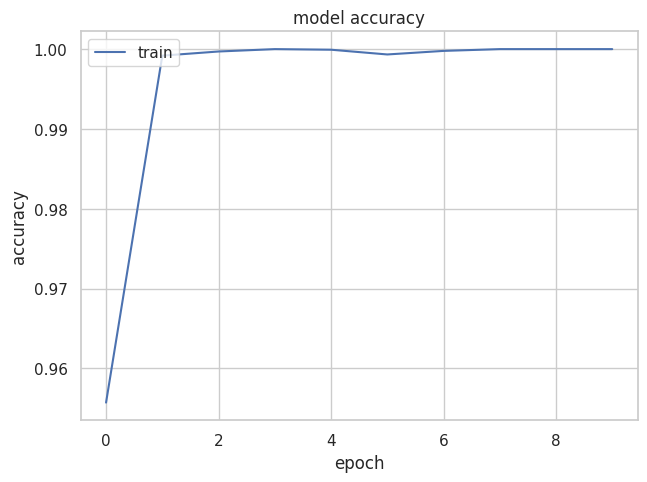

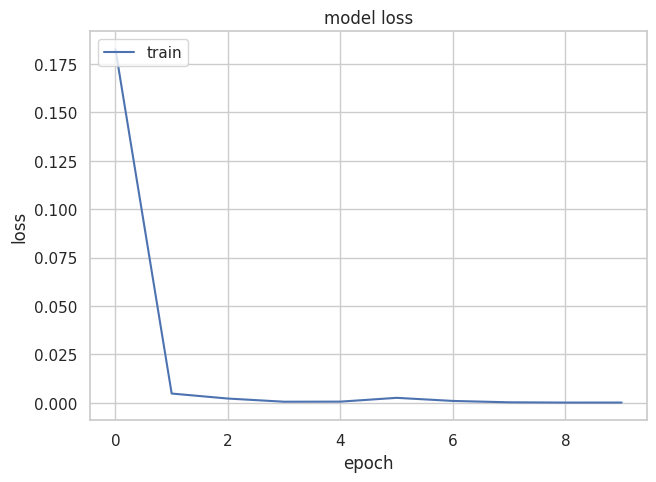

In [6]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(Inception_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(Inception_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [7]:
# assign location
path='/kaggle/working/'
 
# save
model.save("model.h5")

In [10]:
import tensorflow as tf
from keras.models import load_model

# Load a Keras model, convert it to TensorFlow Lite, and upload it to Cloud Storage
model = load_model("/kaggle/working/model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite','wb') as f:
    f.write(tflite_model)
